In [1]:
!pip install -U \
langchain \
langchain-community \
langchain-google-genai \
google-generativeai \
unstructured \
unstructured[pdf] \
faiss-cpu \
pillow \
python-dotenv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 67.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.9 MB/s eta 0:00:00
   ━━━━━

In [1]:
!apt-get update
!apt-get install -y poppler-utils tesseract-ocr


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cli.github.com/packages stable/main amd64 Packages [345 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,225 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd

In [3]:
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from IPython.display import display, Markdown


In [9]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import GoogleGenerativeAIEmbeddings, ChatGoogleGenerativeAI
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.documents import Document
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.document_loaders import TextLoader



In [18]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY


In [19]:
import google.generativeai as genai
import os

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [20]:
for model in genai.list_models():
    print(model.name)

models/embedding-gecko-001
models/gemini-2.5-flash
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-exp-1206
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
models/gemma-3n-e2b-it
models/gemini-flash-latest
models/gemini-flash-lite-latest
models/gemini-pro-latest
models/gemini-2.5-flash-lite
models/gemini-2.5-flash-image-preview
models/gemini-2.5-flash-image
models/gemini-2.5-flash-preview-09-2025
models/gemini-2.5-flash-lite-preview-09-2025
models/gemini-3-pro-preview
models/gemini-3-flash-preview
models/gemini-3-pro-image-preview
models/nano-banana-pro-preview
models/gemini-robotics-er-1.5-preview
models/g

In [34]:
llm = ChatGoogleGenerativeAI(
    model="models/gemini-2.5-flash",
    temperature=0.3
)

In [35]:
response = llm.invoke([
    HumanMessage(content="What is Generative AI?")
])

In [36]:
print(response.content)

Generative AI is a type of Artificial Intelligence that can **create new and original content** across various modalities, rather than just analyzing or classifying existing data.

Think of it as an AI that can *generate* text, images, audio, video, code, or even 3D models based on patterns and structures it learned from vast amounts of existing data during its training.

Here's a breakdown:

1.  **What it Does:**
    *   **Generates New Content:** Its core capability is to produce novel outputs that didn't exist before.
    *   **Learns from Data:** It's trained on massive datasets (e.g., text, images, sounds). During training, it learns the underlying patterns, styles, grammar, and relationships within that data.
    *   **Responds to Prompts:** Users provide a "prompt" (a text description, an example image, an audio clip, etc.), and the AI uses its learned knowledge to generate something that matches the prompt's intent.

2.  **How it Works (Simplified):**
    *   **Training Phase:*

In [43]:
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, UnidentifiedImageError
from IPython.display import display, Markdown
import filetype

def get_image(url,filename,extension):
  response = requests.get(url)
  if response.status_code != 200:
      print(f"Failed to download image from {url}. Status code: {response.status_code}")
      return None

  content = response.content
  print(f"Downloaded content size: {len(content)} bytes")

  content_type = response.headers.get('Content-Type')
  print(f"Content-Type header: {content_type}")
  if not content_type or not content_type.startswith('image/'):
      print(f"Warning: Content-Type is not an image ({content_type}). Attempting to save anyway.")

  filepath = f'/content/{filename}.{extension}'
  with open(filepath,'wb') as f:
    f.write(content)

  kind = filetype.guess(filepath)
  if kind is None:
      print(f'Cannot guess file type for {filepath}!')
  else:
      print(f'Actual file extension: {kind.extension}')
      print(f'Actual MIME type: {kind.mime}')
      if kind.extension != extension:
          print(f"Warning: Guessed file extension '{kind.extension}' does not match requested extension '{extension}'.")

  try:
    image = Image.open(filepath)
    display(image)
    return image
  except UnidentifiedImageError as e:
    print(f"Error opening image: {e}. The file might be corrupted or not a valid image format.")
    return None

Downloaded content size: 10839 bytes
Content-Type header: image/jpeg
Actual file extension: jpg
Actual MIME type: image/jpeg


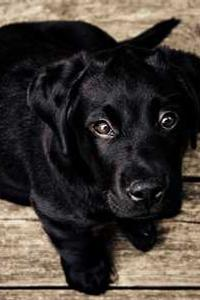

In [54]:
image = get_image("https://picsum.photos/id/237/200/300", "dog", "jpg")

In [56]:
import base64
from io import BytesIO

def pil_to_base64(image: Image.Image) -> str:
    buffer = BytesIO()
    image.save(buffer, format="JPEG")
    return base64.b64encode(buffer.getvalue()).decode("utf-8")


In [57]:
from langchain_core.messages import HumanMessage

image_b64 = pil_to_base64(image)

message = HumanMessage(
    content=[
        {"type": "text", "text": "What is in this image?"},
        {
            "type": "image_url",
            "image_url": f"data:image/jpeg;base64,{image_b64}"
        }
    ]
)

response = llm.invoke([message])
print(response.content)


This image contains a **black labrador puppy**.


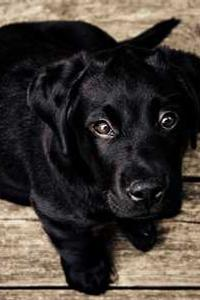

In [61]:
from PIL import Image

image = Image.open("/content/dog.jpg")
display(image)


In [95]:
loader = TextLoader("/content/image.txt")
docs = loader.load()


In [96]:
docs

[Document(metadata={'source': '/content/image.txt'}, page_content='The image shows a black dog sitting calmly and facing the camera.\nThe dog appears to be medium-sized with a short, smooth black coat.\nIts fur looks clean and glossy, indicating good health.\n\nThe dog has floppy ears and dark, expressive eyes.\nIts facial expression suggests curiosity and attentiveness.\nThe posture of the dog is relaxed, with its body upright and stable,\nwhich indicates that the dog is comfortable in its surroundings.\n\nThe dog is positioned outdoors.\nThe background is slightly blurred, which helps keep the focus on the dog.\nThis suggests that the photograph may have been taken using a shallow depth of field.\nThere are no visible signs of distress or aggression in the dog’s body language.\n\nBlack dogs are commonly known for their loyalty and intelligence.\nThey are often trained as companion animals and family pets.\nMany black-coated dogs are used in service roles such as therapy dogs,\nguard 

In [97]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    chunk_size=300,
    chunk_overlap=50,
    separator="\n"
)

chunks = text_splitter.split_documents(docs)


In [98]:
print(f"Total chunks: {len(chunks)}\n")

for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1} ")
    print(chunk.page_content)
    print()


Total chunks: 7

Chunk 1 
The image shows a black dog sitting calmly and facing the camera.
The dog appears to be medium-sized with a short, smooth black coat.
Its fur looks clean and glossy, indicating good health.
The dog has floppy ears and dark, expressive eyes.
Its facial expression suggests curiosity and attentiveness.

Chunk 2 
The posture of the dog is relaxed, with its body upright and stable,
which indicates that the dog is comfortable in its surroundings.
The dog is positioned outdoors.
The background is slightly blurred, which helps keep the focus on the dog.

Chunk 3 
This suggests that the photograph may have been taken using a shallow depth of field.
There are no visible signs of distress or aggression in the dog’s body language.
Black dogs are commonly known for their loyalty and intelligence.
They are often trained as companion animals and family pets.

Chunk 4 
Many black-coated dogs are used in service roles such as therapy dogs,
guard dogs, and assistance animals be

In [99]:
embeddings = GoogleGenerativeAIEmbeddings(model ="models/text-embedding-004")

In [100]:
vector = embeddings.embed_query("The image shows a black dog sitting calmly.")
print(len(vector))


768


In [101]:
vectorstore = FAISS.from_documents(docs,embedding= embeddings)

In [102]:
print(vectorstore.index.ntotal)

1


In [103]:
retriever = vectorstore.as_retriever(
    search_kwargs={"k": 1}
)


In [104]:
query = "What is the color of the dog?"


In [105]:
retrieved_docs = retriever.invoke(query)


In [106]:
print("Retrieved text:\n")
print(retrieved_docs[0].page_content)

print("\nMetadata:")
print(retrieved_docs[0].metadata)


Retrieved text:

The image shows a black dog sitting calmly and facing the camera.
The dog appears to be medium-sized with a short, smooth black coat.
Its fur looks clean and glossy, indicating good health.

The dog has floppy ears and dark, expressive eyes.
Its facial expression suggests curiosity and attentiveness.
The posture of the dog is relaxed, with its body upright and stable,
which indicates that the dog is comfortable in its surroundings.

The dog is positioned outdoors.
The background is slightly blurred, which helps keep the focus on the dog.
This suggests that the photograph may have been taken using a shallow depth of field.
There are no visible signs of distress or aggression in the dog’s body language.

Black dogs are commonly known for their loyalty and intelligence.
They are often trained as companion animals and family pets.
Many black-coated dogs are used in service roles such as therapy dogs,
guard dogs, and assistance animals because of their calm temperament.

Th

In [107]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser


In [108]:
prompt = ChatPromptTemplate.from_template(
    """
You are a helpful assistant.
Answer the question ONLY using the given context.
If the answer is not in the context, say "I don't know".

Context:
{context}

Question:
{question}
"""
)


In [109]:
def format_docs(docs):
    return "\n".join(doc.page_content for doc in docs)

retriever_runnable = RunnableLambda(
    lambda question: format_docs(retriever.invoke(question))
)

In [110]:
rag_chain = (
    {
        "context": retriever_runnable,
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)


In [111]:
question = "What is the color of the dog?"

answer = rag_chain.invoke(question)
print(answer)


The color of the dog is black.


In [114]:
question = "What AI tasks can use this image?"

answer = rag_chain.invoke(question)
print(answer)

Dogs like the one shown in this image are frequently used in computer vision and artificial intelligence tasks. Such images are useful for image classification, object detection, image captioning, and multimodal retrieval systems.


In [113]:
question = "What breed is the dog?."   # hallucination releted Question that why its give the i dont know about the breed of the dog

answer = rag_chain.invoke(question)
print(answer)


I don't know


In [115]:
docs = retriever.invoke(question)

for i, doc in enumerate(docs):
    print(f"\nSource Chunk {i+1}:")
    print(doc.page_content)



Source Chunk 1:
The image shows a black dog sitting calmly and facing the camera.
The dog appears to be medium-sized with a short, smooth black coat.
Its fur looks clean and glossy, indicating good health.

The dog has floppy ears and dark, expressive eyes.
Its facial expression suggests curiosity and attentiveness.
The posture of the dog is relaxed, with its body upright and stable,
which indicates that the dog is comfortable in its surroundings.

The dog is positioned outdoors.
The background is slightly blurred, which helps keep the focus on the dog.
This suggests that the photograph may have been taken using a shallow depth of field.
There are no visible signs of distress or aggression in the dog’s body language.

Black dogs are commonly known for their loyalty and intelligence.
They are often trained as companion animals and family pets.
Many black-coated dogs are used in service roles such as therapy dogs,
guard dogs, and assistance animals because of their calm temperament.

Th

In [116]:
prompt = ChatPromptTemplate.from_template(
"""
Answer the question ONLY using the given context.
If the answer is not clearly present, say:
"I don't know based on the document."

Context:
{context}

Question:
{question}
"""
)


In [117]:
questions = [
    "What color is the dog?",
    "Is the dog indoors or outdoors?",
    "What AI tasks can use this image?",
    "What does the posture indicate?"
]

for q in questions:
    print("\nQ:", q)
    print("A:", rag_chain.invoke(q))



Q: What color is the dog?
A: The dog is black.

Q: Is the dog indoors or outdoors?
A: The dog is positioned outdoors.

Q: What AI tasks can use this image?
A: This image can be used for image classification, object detection, image captioning, and multimodal retrieval systems in AI tasks.

Q: What does the posture indicate?
A: The posture of the dog is relaxed, with its body upright and stable, which indicates that the dog is comfortable in its surroundings.


In [121]:
retrieved_docs = retriever.invoke(question)


In [122]:
context = "\n".join(doc.page_content for doc in retrieved_docs)


In [123]:
from langchain_core.messages import HumanMessage

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": f"""
Use the context below and the image to answer.

Context:
{context}

Question:
{question}
"""
        },
        {
            "type": "image_url",
            "image_url": f"data:image/jpeg;base64,{image_b64}"
        }
    ]
)

response = llm.invoke([message])
print(response.content)


Based on the provided context, this image can be used for the following AI tasks:

*   Image classification
*   Object detection
*   Image captioning
*   Multimodal retrieval systems
